In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
import os
random.seed(5026)
target = np.sort([0] + random.sample(range(1, 69), 25))
num = []
for i in target:
    files = os.listdir(os.path.join("PIE", str(i)))
    n = len([j for j in files if j.endswith('.jpg')])
    num.append(n)
X = np.empty((sum(num), 32, 32))
y = np.empty((sum(num), 1))
for i, j in enumerate(target):
    for k, img_path in enumerate([f for f in os.listdir(os.path.join('PIE', str(j))) if f.endswith('.jpg')]):
        img_path = os.path.join('PIE', str(j), str(k+1)+'.jpg')
        X[sum(num[:i]) + k, :, :] = np.array(Image.open(img_path))
        y[sum(num[:i]) + k] = j
X_CMU = X[y.flatten() != 0, :, :]
y_CMU = y[y != 0]
X_self = X[y.flatten() == 0, :, :]
y_self = y[y == 0]
np.random.seed(42)
total_samples = len(X_CMU)
train_size = int(0.7 * total_samples)
train_indices = np.random.choice(total_samples, train_size, replace=False)
X_train_CMU = X_CMU[train_indices]
y_train_CMU = y_CMU[train_indices]
X_test_CMU = np.delete(X_CMU, train_indices, axis=0)
y_test_CMU = np.delete(y_CMU, train_indices, axis=0)
np.random.seed(42)
total_samples = len(X_self)
train_size = int(0.7 * total_samples)
train_indices = np.random.choice(total_samples, train_size, replace=False)
X_train_self = X_self[train_indices]
y_train_self = y_self[train_indices]
X_test_self = np.delete(X_self, train_indices, axis=0)
y_test_self = np.delete(y_self, train_indices, axis=0)
X_train = np.concatenate([X_train_CMU, X_train_self], axis = 0)
y_train = np.concatenate([y_train_CMU, y_train_self], axis = 0)
X_test = np.concatenate([X_test_CMU, X_test_self], axis = 0)
y_test = np.concatenate([y_test_CMU, y_test_self], axis = 0)

In [2]:
X_train_raw = X_train.reshape(X_train.shape[0], -1)
X_test_raw = X_test.reshape(X_test.shape[0], -1)
raw_face_images = [X_train_raw, X_test_raw]

X_train_reshape = X_train.reshape(X_train.shape[0], -1)
mean = np.mean(X_train_reshape, axis = 0)
std = np.std(X_train_reshape, axis = 0)
X_train_normalize = (X_train_reshape - mean) / std

X_train_CMU_reshape = X_train_CMU.reshape(X_train_CMU.shape[0], -1)
mean = np.mean(X_train_CMU_reshape, axis = 0)
std = np.std(X_train_CMU_reshape, axis = 0)
X_train_CMU_normalize = (X_train_CMU_reshape - mean) / std

X_train_self_reshape = X_train_self.reshape(X_train_self.shape[0], -1)
mean = np.mean(X_train_self_reshape, axis = 0)
std = np.std(X_train_self_reshape, axis = 0)
X_train_self_normalize = (X_train_self_reshape - mean) / std

X_test_reshape = X_test.reshape(X_test.shape[0], -1)
mean = np.mean(X_test_reshape, axis = 0)
std = np.std(X_test_reshape, axis = 0)
X_test_normalize = (X_test_reshape - mean) / std

X_test_CMU_reshape = X_test_CMU.reshape(X_test_CMU.shape[0], -1)
mean = np.mean(X_test_CMU_reshape, axis = 0)
std = np.std(X_test_CMU_reshape, axis = 0)
X_test_CMU_normalize = (X_test_CMU_reshape - mean) / std

X_test_self_reshape = X_test_self.reshape(X_test_self.shape[0], -1)
mean = np.mean(X_test_self_reshape, axis = 0)
std = np.std(X_test_self_reshape, axis = 0)
X_test_self_normalize = (X_test_self_reshape - mean) / std

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [4]:
model = models.Sequential()

In [5]:
model.add(layers.Conv2D(20, (5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))

In [6]:
model.add(layers.Conv2D(50, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [7]:
model.add(layers.Flatten())

In [8]:
model.add(layers.Dense(500, activation='relu'))

In [9]:
model.add(layers.Dense(26, activation='softmax'))

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 20)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 50)        25050     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 50)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1250)              0         
                                                                 
 dense (Dense)               (None, 500)               6

In [12]:
X_train = X_train.reshape(-1, 32, 32, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32, 32, 1).astype('float32') / 255.0

In [13]:
num_classes = 26
y_train_processed = np.clip(y_train, 0, num_classes - 1).astype(np.int32)
y_test_processed = np.clip(y_test, 0, num_classes - 1).astype(np.int32)

In [14]:
epochs = 10
batch_size = 32 
history = model.fit(X_train, y_train_processed, epochs=epochs, batch_size=batch_size)

Epoch 1/10
94/94 [==============================] - 1s 8ms/step - loss: 1.3838 - accuracy: 0.6707
Epoch 2/10
94/94 [==============================] - 1s 9ms/step - loss: 0.9443 - accuracy: 0.7193
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.4524 - accuracy: 0.8457
Epoch 4/10
94/94 [==============================] - 1s 10ms/step - loss: 0.2246 - accuracy: 0.9256
Epoch 5/10
94/94 [==============================] - 1s 8ms/step - loss: 0.1293 - accuracy: 0.9631
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0780 - accuracy: 0.9816
Epoch 7/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0493 - accuracy: 0.9883
Epoch 8/10
94/94 [==============================] - 1s 9ms/step - loss: 0.0373 - accuracy: 0.9920
Epoch 9/10
94/94 [==============================] - 1s 11ms/step - loss: 0.0306 - accuracy: 0.9940
Epoch 10/10
94/94 [==============================] - 1s 8ms/step - loss: 0.0376 - accuracy: 0.9896


In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_processed)

40/40 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9898


In [16]:
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9898278713226318


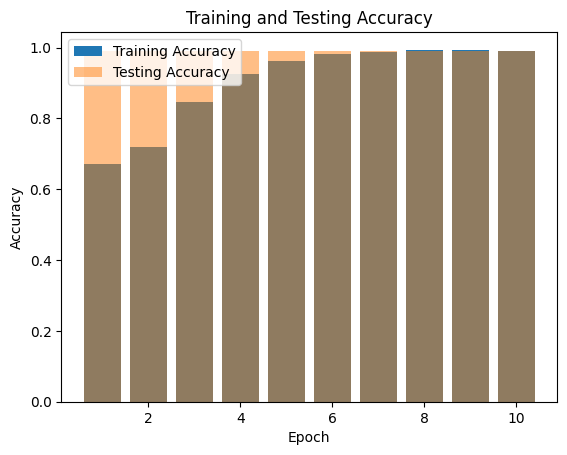

In [17]:
train_accuracy = history.history['accuracy']
test_accuracy_list = [test_accuracy] * len(train_accuracy)
epochs_range = range(1, epochs + 1)
plt.bar(epochs_range, train_accuracy, label = 'Training Accuracy')
plt.bar(epochs_range, test_accuracy_list, label = 'Testing Accuracy', alpha = 0.5)
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

40/40 [==============================] - 0s 4ms/step - loss: 0.0391 - accuracy: 0.9898


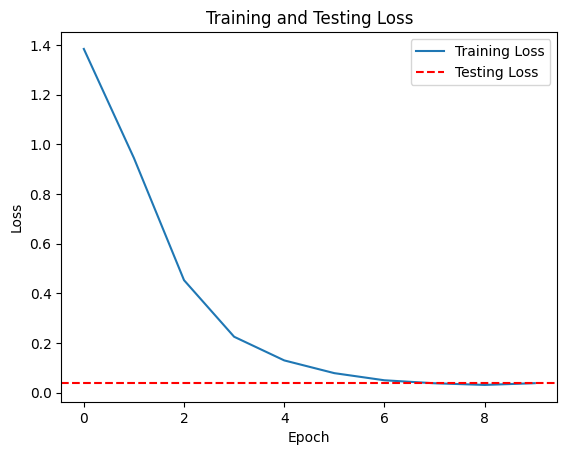

Test Loss: 0.03910709172487259


In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_processed)
plt.plot(history.history['loss'], label='Training Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Test Loss:", test_loss)